In [3]:
import pandas as pd
import scipy, numpy as np
from chefboost import Chefboost as chef
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import chi2_kernel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import scikitplot as skplt

In [12]:
names = ['Decision','region-centroid-col','region-centroid-row','region-pixel-count','short-line-density-5','short-line-density-2','vedge-mean','vegde-sd','hedge-mean','hedge-sd','intensity-mean','rawred-mean','rawblue-mean','rawgreen-mean','exred-mean','exblue-mean','exgreen-mean','value-mean','saturatoin-mean','hue-mean']
dataset =pd.read_csv("C:\\Users\\Hp\\Downloads\\segmentation.data",names = names)
dataset.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)
array=dataset.values
x=array[:,1:20]
y=array[:,0]
#accuracy=[]
#fscore=[]


In [17]:
######################### PRE PROCESSING ##############################
scaler = MinMaxScaler(feature_range=(0,1))
i=0
while(i<19):
    rescaled_X = scaler.fit_transform(x[:,i].reshape(-1,1))
    np.set_printoptions(precision=2)
    x[:,i]=rescaled_X.reshape(-1)
    i+=1
print(x)

scaler = Normalizer().fit(x)
x = scaler.transform(x)


[[0.5537848605577689 0.47698744769874474 0.0 ... 0.05154639085753762
  0.5456349 0.26114959283107975]
 [0.7450199203187251 0.5104602510460251 0.0 ... 0.05596465717257248
  0.53858024 0.2976590977017302]
 [0.41434262948207173 0.5355648535564853 0.0 ... 0.05007363564010577
  0.5326279 0.29003687979844034]
 ...
 [0.7808764940239044 0.9414225941422594 0.0 ... 0.12297495859370426
  0.29272884 0.9860763420482466]
 [0.8247011952191234 0.9581589958158996 0.0 ... 0.12297495859370426
  0.42162097 0.9124437123880922]
 [0.8844621513944223 0.7280334728033473 0.0 ... 0.1163475654171755
  0.44541803 0.80983996514823]]


0.8571428571428571
[[10  0  0  0  0  0  0]
 [ 0  9  0  1  1  2  0]
 [ 0  0  7  1  0  0  2]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0 11  0  0]
 [ 0  0  0  0  0  6  0]
 [ 1  0  1  0  0  0  4]]
              precision    recall  f1-score   support

   BRICKFACE       0.91      1.00      0.95        10
      CEMENT       1.00      0.69      0.82        13
     FOLIAGE       0.88      0.70      0.78        10
       GRASS       0.78      1.00      0.88         7
        PATH       0.92      1.00      0.96        11
         SKY       0.75      1.00      0.86         6
      WINDOW       0.67      0.67      0.67         6

    accuracy                           0.86        63
   macro avg       0.84      0.87      0.84        63
weighted avg       0.87      0.86      0.85        63



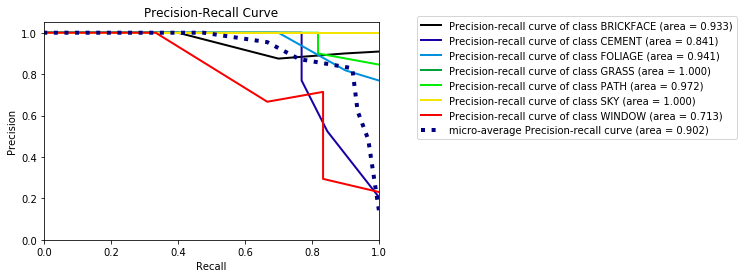

In [6]:
#############   KNN WITH RANDOM TEST SPLIT ################
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=7)
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
predictions = knn.predict(X_test)
acc = accuracy_score(Y_test,predictions)
f1=f1_score(Y_test, predictions, average='macro')
print(acc)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
accuracy.append(acc)
fscore.append(f1)
###### precision recall graph ###########
p=knn.predict_proba(X_test)
skplt.metrics.plot_precision_recall(Y_test, p)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [7]:
#############   KNN WITH KFOLDS CROSS VAL ################
knn=KNeighborsClassifier(n_neighbors=7)
cv = KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in cv.split(x):
    X_train, X_test, Y_train, Y_test = x[train_index], x[test_index], y[train_index], y[test_index]
    knn.fit(X_train,Y_train)
    prediction = knn.predict(X_test)
    print(accuracy_score(Y_test,prediction))

0.47619047619047616
0.8095238095238095
0.9047619047619048
0.47619047619047616
0.47619047619047616
0.47619047619047616
0.09523809523809523
0.8095238095238095
1.0
1.0


0.5396825396825397
[[4 1 0 0 0 0 5]
 [1 8 1 0 1 0 2]
 [1 0 1 0 0 0 8]
 [0 0 0 7 0 0 0]
 [0 8 0 0 2 0 1]
 [0 0 0 0 0 6 0]
 [0 0 0 0 0 0 6]]
              precision    recall  f1-score   support

   BRICKFACE       0.67      0.40      0.50        10
      CEMENT       0.47      0.62      0.53        13
     FOLIAGE       0.50      0.10      0.17        10
       GRASS       1.00      1.00      1.00         7
        PATH       0.67      0.18      0.29        11
         SKY       1.00      1.00      1.00         6
      WINDOW       0.27      1.00      0.43         6

    accuracy                           0.54        63
   macro avg       0.65      0.61      0.56        63
weighted avg       0.63      0.54      0.51        63



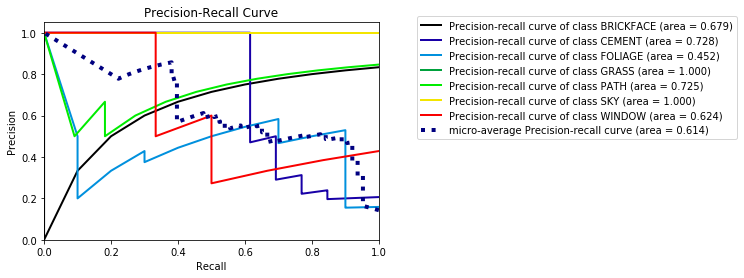

In [8]:
#############   NaiveBayes WITH RANDOM TEST SPLIT ################
naive = GaussianNB()
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=7)
naive.fit(X_train,Y_train)
predictions = naive.predict(X_test)
acc = accuracy_score(Y_test,predictions)
f1=f1_score(Y_test, predictions, average='macro')
print(acc)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
accuracy.append(acc)
fscore.append(f1)
###### precision recall graph ###########
p=naive.predict_proba(X_test)
skplt.metrics.plot_precision_recall(Y_test, p)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [9]:
#############   NaiveBayes WITH KFOLDS CROSS VAL ################
naive = GaussianNB()
cv = KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in cv.split(x):
    X_train, X_test, Y_train, Y_test = x[train_index], x[test_index], y[train_index], y[test_index]
    naive.fit(X_train,Y_train)
    predictions = naive.predict(X_test)
    print(accuracy_score(Y_test,predictions))

0.7142857142857143
0.7619047619047619
0.8571428571428571
0.38095238095238093
0.42857142857142855
0.7142857142857143
0.9047619047619048
0.5238095238095238
1.0
0.7619047619047619


In [15]:
#############   C4.5 WITH WITH RANDOM TEST SPLIT ################
names = ['Decision','region-centroid-col','region-centroid-row','region-pixel-count','short-line-density-5','short-line-density-2','vedge-mean','vegde-sd','hedge-mean','hedge-sd','intensity-mean','rawred-mean','rawblue-mean','rawgreen-mean','exred-mean','exblue-mean','exgreen-mean','value-mean','saturatoin-mean','hue-mean']
dataset =pd.read_csv("C:\\Users\\Hp\\Downloads\\segmentation.data",names = names)
dataset.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)
decision_column=dataset.pop("Decision")
dataset.insert(len(dataset.columns),'Decision',decision_column)
config = {'algorithm': 'C4.5'}
model = chef.fit(dataset, config)
a=[]
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=7)
for xx in X_test:
    a.append(chef.predict(model, xx))
acc = accuracy_score(Y_test,a)
f1=f1_score(Y_test, a, average='macro')
accuracy.append(acc)
fscore.append(f1)
print(acc)
print(confusion_matrix(Y_test,a))
print(classification_report(Y_test,a))

C4.5  tree is going to be built...
Accuracy:  100.0 % on  210  instances
finished in  22.34990954399109  seconds
1.0
[[10  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0]
 [ 0  0 10  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0 11  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  6]]
              precision    recall  f1-score   support

   BRICKFACE       1.00      1.00      1.00        10
      CEMENT       1.00      1.00      1.00        13
     FOLIAGE       1.00      1.00      1.00        10
       GRASS       1.00      1.00      1.00         7
        PATH       1.00      1.00      1.00        11
         SKY       1.00      1.00      1.00         6
      WINDOW       1.00      1.00      1.00         6

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [16]:
################## C4.5 WITH KFOLDS CROSS VAL  ###############

cv = KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in cv.split(x):
    X_train, X_test, Y_train, Y_test = x[train_index], x[test_index], y[train_index], y[test_index]
    a=[]
    for xx in X_test:
        a.append(chef.predict(model, xx))
    print(accuracy_score(Y_test,a))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


0.6984126984126984
[[5 0 0 0 0 0 5]
 [0 5 2 0 4 1 1]
 [0 0 8 0 0 0 2]
 [0 0 0 7 0 0 0]
 [0 2 1 0 8 0 0]
 [0 0 0 0 0 6 0]
 [1 0 0 0 0 0 5]]
              precision    recall  f1-score   support

   BRICKFACE       0.83      0.50      0.62        10
      CEMENT       0.71      0.38      0.50        13
     FOLIAGE       0.73      0.80      0.76        10
       GRASS       1.00      1.00      1.00         7
        PATH       0.67      0.73      0.70        11
         SKY       0.86      1.00      0.92         6
      WINDOW       0.38      0.83      0.53         6

    accuracy                           0.70        63
   macro avg       0.74      0.75      0.72        63
weighted avg       0.74      0.70      0.69        63



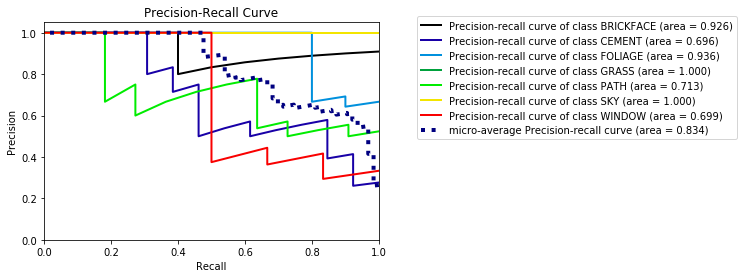

In [18]:
#############   SVC using rbf kernel with chi squared metric WITH RANDOM TEST SPLIT ################
K = chi2_kernel(x, gamma=0.4)
X_train,X_test,Y_train,Y_test = train_test_split(K,y,test_size=0.30,random_state=7)
svclassifier = SVC(kernel='rbf', C=1,probability=True)
svclassifier.fit(X_train,Y_train)
predictions = svclassifier.predict(X_test)
acc = accuracy_score(Y_test,predictions)
f1=f1_score(Y_test, predictions, average='macro')
accuracy.append(acc)
fscore.append(f1)
print(acc)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
###### precision recall graph ###########
p=svclassifier.predict_proba(X_test)
skplt.metrics.plot_precision_recall(Y_test, p)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [76]:
#############   SVC using rbf kernel with chi squared metric WITH KFOLDS CROSS VAL ################
cv = KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in cv.split(K):
    X_train, X_test, Y_train, Y_test = K[train_index], K[test_index], y[train_index], y[test_index]
    svclassifier.fit(X_train,Y_train)
    predictions = svclassifier.predict(X_test)
    print(accuracy_score(Y_test,predictions))

0.0
0.7142857142857143
1.0
0.0
0.19047619047619047
0.19047619047619047
0.09523809523809523
0.047619047619047616
0.5238095238095238
1.0


[0.8571428571428571, 0.5396825396825397, 1.0, 0.6984126984126984]


<BarContainer object of 4 artists>

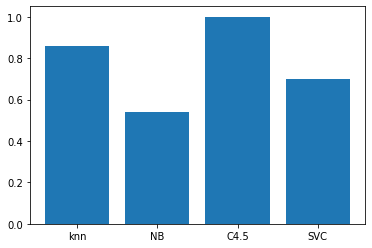

In [19]:
classifiers = ["knn",'NB','C4.5','SVC']
print(accuracy)
plt.bar(classifiers,accuracy)

[0.8433816873257867, 0.5591836734693877, 1.0, 0.7188499497669161]


<BarContainer object of 4 artists>

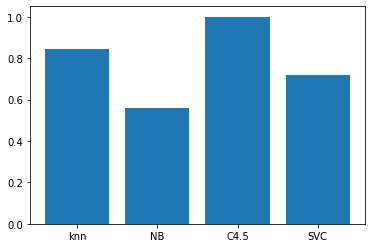

In [20]:
print(fscore)
plt.bar(classifiers,fscore)